<a href="https://colab.research.google.com/github/Manash-Christ/ML-LABS/blob/main/2348528_LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV as lrcv
from sklearn.linear_model import SGDClassifier


from sklearn.model_selection import train_test_split as tts

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score, cohen_kappa_score, matthews_corrcoef, f1_score, jaccard_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

# ML LAB - 5
## LOGISTIC REGRESSION

##### DATA PRE-PROCESSING

In [ ]:
df=pd.read_csv('MLLAB5.csv')
def vif(df):
    viff = {}
    for i in df.drop('Churn',axis=1).columns:
        y = df[i]
        X = df.drop(i, axis=1)
        lr = LinearRegression()
        reg = lr.fit(X, y)
        rs = reg.score(X, y)
        viff[i] = round(1/(1-rs),2)
    return viff

def preprocess(df):
    print("PRE-PROCESSING")
    print("\n")
    print('0. finding index column...')
    for i in df.columns:
        #print(f'{df[i]}')
        if df[i].nunique() == len(df):
            df.set_index(i, inplace=True)
    print(f'Selected index as {df.index.name}')
    print("\n")
    print('1. Looking for Nulls...')
    nul = [cols for cols in df.columns if df[cols].isna().sum() != 0]
    print(f'{df[nul].isna().sum().values.__int__()} Nulls present in {str("".join(nul))}')
    print(f'Data type of {"".join(nul)} is {str(df[nul].dtypes[0])}')
    print(f'Since it is a numeric, continous varible, we can impute the NaNs with the columns mean')
    print('Imputing means....')
    df[nul] = df[nul].fillna(df[nul].mean())
    print("No nulls" if df.columns.isna().sum() == 0 else "Nulls still present")
    print("\n")
    print('2. Looking for categorical variables....')
    cat = [cols for cols in df.columns if str(df[cols].dtypes) == 'object']
    print(f'Categorical variables are: {", ".join(cat)}', end = '.')
    print("\nWe have two ways to encode the categorical variables; LabelEncoder or Dummy Variable.")
    user = int(input("Enter 0 for LabelEncoder and 1 for Dummy Variable."))
    if user == 0:
        print("Label Encoding categorical variables...")
        lb = LabelEncoder()
        for i in cat:
            df[i] = lb.fit_transform(df[i])

    elif user == 1:
        print("Dummy Encoding categorial variables...")
        cat = cat.remove('Churn')
        df['Churn'] = df['Churn'].replace({'Yes':1, 'No':0})
        df = pd.get_dummies(df, drop_first=True, dtype='int')

    print("\n")
    print("3. Variance influencing factor...")
    v = vif(df)
    vf = pd.Series(v).sort_values(ascending=False)
    print(vf)
    print(f"Highly Colinear variables are {' '.join(vf[vf>10].index.to_list())}")
    print("Creating new variable; Monthly Charges as a proportion of Total Charges to remove multicollinearity")
    df['charge_prop'] = df['MonthlyCharges']/df['TotalCharges']
    df.drop(['MonthlyCharges','TotalCharges'],axis=1,inplace=True)
    print("\n")
    print("Using Label encoding produces less linearly dependent result")
    print("Proceed to model development....")
    return df
preprocess(df)

PRE-PROCESSING


0. finding index column...
Selected index as customerID


1. Looking for Nulls...
11 Nulls present in TotalCharges
Data type of TotalCharges is float64
Since it is a numeric, continous varible, we can impute the NaNs with the columns mean
Imputing means....
No nulls


2. Looking for categorical variables....
Categorical variables are: gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn.
We have two ways to encode the categorical variables; LabelEncoder or Dummy Variable.


Enter 0 for LabelEncoder and 1 for Dummy Variable. 0


Label Encoding categorical variables...


3. Variance influencing factor...
TotalCharges        10.45
tenure               7.22
MonthlyCharges       5.14
Contract             2.48
InternetService      1.84
PhoneService         1.63
Partner              1.46
StreamingTV          1.45
StreamingMovies      1.45
MultipleLines        1.40
Dependents           1.38
TechSupport          1.33
DeviceProtection     1.30
OnlineSecurity       1.28
OnlineBackup         1.22
PaperlessBilling     1.21
PaymentMethod        1.19
SeniorCitizen        1.15
gender               1.00
dtype: float64
Highly Colinear variables are TotalCharges
Creating new variable; Monthly Charges as a proportion of Total Charges to remove multicollinearity


Using Label encoding produces less linearly dependent result
Proceed to model development....


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,charge_prop
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0,1.000000
5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,0,0.030140
3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,1,0.497920
7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,0,0.022980
9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,1,0.466205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,0,0.042602
2234-XADUH,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,0,0.014016
4801-JZAZL,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,0,0.085438


In [ ]:
numeric_col = [x for x in df if df[x].nunique() > 10]
cat_col = [x for x in df if df[x].nunique() <= 3]
def plot(df):
    print(f"Categorical columns --> {' '.join(cat_col)}")

plot(df)

Categorical columns --> gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling Churn


##### MODEL BUILDING

In [ ]:
#train-test split
def train_test(df):
    X = df.drop('Churn', axis=1)
    y = df['Churn']
    return tts(X,y, test_size=0.2)



customerID
6152-ONASV    0
2357-COQEK    1
3312-UUMZW    0
7993-PYKOF    1
6029-WTIPC    1
             ..
8755-OGKNA    0
2087-QAREY    0
5153-LXKDT    0
6481-OGDOO    1
3354-OADJP    0
Name: Churn, Length: 1409, dtype: int64

In [ ]:
#Logistic model with no regularization
y_pred = pd.DataFrame(columns=['Y_true'])
y_pred['Y_true'] = yte


def logistic(df, **kwargs):
    lr = LogisticRegression(penalty=None, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight='balanced',
                    random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
    lr.fit(xtr,ytr)
    yt = lr.predict(xte)
    y_pred['Logistic'] = yt

    cmpr.iloc[0,0] = lr.score(xte,yte)
    cmpr.iloc[0,1] = precision_score(yte, yt)
    cmpr.iloc[0,2] = recall_score(yte, yt)
    cmpr.iloc[0,3] = roc_auc_score(yte, yt)
    cmpr.iloc[0,4] = cohen_kappa_score(yte, yt)
    cmpr.iloc[0,5] = matthews_corrcoef(yte, yt)
    cmpr.iloc[0,7] = f1_score(yte, yt)
    cmpr.iloc[0,6] = jaccard_score(yte, yt)

    return y_pred, cmpr

def logisticCV(df, **kwargs):
    lr = lrcv(cv= 100,penalty='l2', dual=False, tol=0.0001, fit_intercept=True, intercept_scaling=1, class_weight=None,
              random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, n_jobs=None)
    lr.fit(xtr,ytr)
    yt = lr.predict(xte)
    y_pred['LogisticCV'] = yt

    cmpr.iloc[1,0] = lr.score(xte,yte)
    cmpr.iloc[1,1] = precision_score(yte, yt)
    cmpr.iloc[1,2] = recall_score(yte, yt)
    cmpr.iloc[1,3] = roc_auc_score(yte, yt)
    cmpr.iloc[1,4] = cohen_kappa_score(yte, yt)
    cmpr.iloc[1,5] = matthews_corrcoef(yte, yt)
    cmpr.iloc[1,7] = f1_score(yte, yt)
    cmpr.iloc[1,6] = jaccard_score(yte, yt)


def sgd_hinge(df, **kwargs):
    lr = SGDClassifier(loss='hinge',penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True,
                       verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False,
                       validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
    lr.fit(xtr,ytr)
    yt = lr.predict(xte)
    y_pred['SGD-hinge'] = yt

    cmpr.iloc[2,0] = lr.score(xte,yte)
    cmpr.iloc[2,1] = precision_score(yte, yt)
    cmpr.iloc[2,2] = recall_score(yte, yt)
    cmpr.iloc[2,3] = roc_auc_score(yte, yt)
    cmpr.iloc[2,4] = cohen_kappa_score(yte, yt)
    cmpr.iloc[2,5] = matthews_corrcoef(yte, yt)
    cmpr.iloc[2,7] = f1_score(yte, yt)
    cmpr.iloc[2,6] = jaccard_score(yte, yt)

def sgd_log_loss(df, **kwargs):
    lr = SGDClassifier(loss='log_loss',penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True,
                       verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False,
                       validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
    lr.fit(xtr,ytr)
    yt = lr.predict(xte)
    y_pred['SGD-log_loss'] = yt

    cmpr.iloc[3,0] = lr.score(xte,yte)
    cmpr.iloc[3,1] = precision_score(yte, yt)
    cmpr.iloc[3,2] = recall_score(yte, yt)
    cmpr.iloc[3,3] = roc_auc_score(yte, yt)
    cmpr.iloc[3,4] = cohen_kappa_score(yte, yt)
    cmpr.iloc[3,5] = matthews_corrcoef(yte, yt)
    cmpr.iloc[3,7] = f1_score(yte, yt)
    cmpr.iloc[3,6] = jaccard_score(yte, yt)

cmpr = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'AUC', 'C-kappa', 'Matthew', 'jaccard', 'f1_score'],
                    index = ['Logistic', 'LogisticCV', 'SGD-log_loss', 'SGD-hinge'] )
stay = True
while stay:
    user = input("Enter the model that needs to be tested: ('log' for logistic regression, \
    'logc' for logistic regression with cross validation, 'sgd_hinge' for stochastic gradient descent with hinge loss, \
    'sgd_log_loss' for stochastic gradient descent with log loss (or) 'exit' to end.")
    if str(user) == 'log':
        print('Logistic Regression')
        logistic(df)

    elif str(user) == 'logc':
        print('Logistic Cross-Validated Regression')
        logisticCV(df)

    elif str(user) == 'sgd_hinge':
        print('Stochastic Gradient Descent with hinge loss')
        sgd_hinge(df)

    elif str(user) == 'sgd_log_loss':
        print('Stochastic Gradient Descent with Log Loss')
        sgd_log_loss(df)


    elif str(user).lower() == 'exit':
        stay = False





Enter the model that needs to be tested: ('log' for logistic regression,     'logc' for logistic regression with cross validation, 'sgd_hinge' for stochastic gradient descent with hinge loss,     'sgd_log_loss' for stochastic gradient descent with log loss (or) 'exit' to end. log


Logistic Regression


Enter the model that needs to be tested: ('log' for logistic regression,     'logc' for logistic regression with cross validation, 'sgd_hinge' for stochastic gradient descent with hinge loss,     'sgd_log_loss' for stochastic gradient descent with log loss (or) 'exit' to end. logc


Logistic Cross-Validated Regression


Enter the model that needs to be tested: ('log' for logistic regression,     'logc' for logistic regression with cross validation, 'sgd_hinge' for stochastic gradient descent with hinge loss,     'sgd_log_loss' for stochastic gradient descent with log loss (or) 'exit' to end. sgd_hinge


Stochastic Gradient Descent with hinge loss


Enter the model that needs to be tested: ('log' for logistic regression,     'logc' for logistic regression with cross validation, 'sgd_hinge' for stochastic gradient descent with hinge loss,     'sgd_log_loss' for stochastic gradient descent with log loss (or) 'exit' to end. sgd_log_loss


Stochastic Gradient Descent with Log Loss


Enter the model that needs to be tested: ('log' for logistic regression,     'logc' for logistic regression with cross validation, 'sgd_hinge' for stochastic gradient descent with hinge loss,     'sgd_log_loss' for stochastic gradient descent with log loss (or) 'exit' to end. exit


In [ ]:
cmpr

,Accuracy,Precision,Recall,AUC,C-kappa,Matthew,jaccard,f1_score
Logistic,0.745209,0.529915,0.786802,0.757933,0.449244,0.469869,0.463378,0.633299
LogisticCV,0.797019,0.674194,0.530457,0.715475,0.461017,0.466904,0.422222,0.59375
SGD-log_loss,0.764372,0.574879,0.604061,0.715331,0.424077,0.424332,0.417544,0.589109
SGD-hinge,0.756565,0.697674,0.228426,0.595001,0.239224,0.295693,0.207852,0.344168


In [ ]:
for i in y_pred.columns:
    print(y_pred[i].value_counts())

Y_true
0    1015
1     394
Name: count, dtype: int64
Logistic
0    824
1    585
Name: count, dtype: int64
LogisticCV
0    1099
1     310
Name: count, dtype: int64
SGD-hinge
0    995
1    414
Name: count, dtype: int64
SGD-log_loss
0    1280
1     129
Name: count, dtype: int64


In [ ]:
def evaluation():
    #CONFUSION MATRIX
    #ACCURACY
    #PRECISION
    #RECALL
    #SENSITIVITY
    #SPECIFICITY

array([5174, 1869])

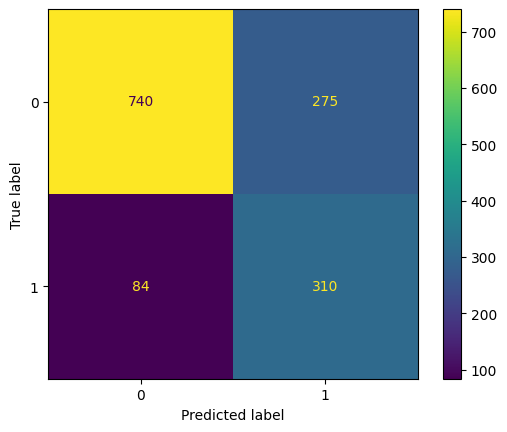

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_pred['Y_true'],y_pred['Logistic'])).plot()

In [ ]:
confusion_matrix(y_pred['Y_true'],y_pred['Logistic'])

array([[740, 275],
       [ 84, 310]])

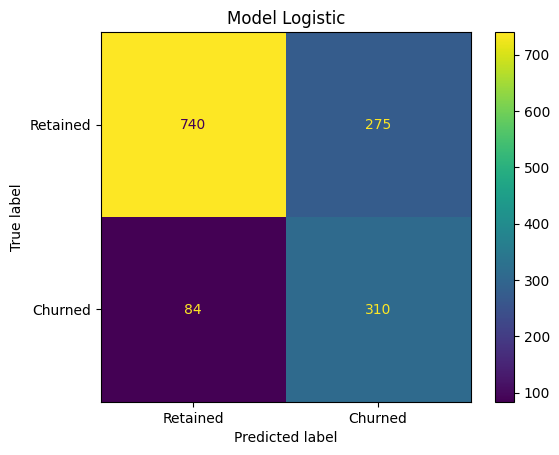

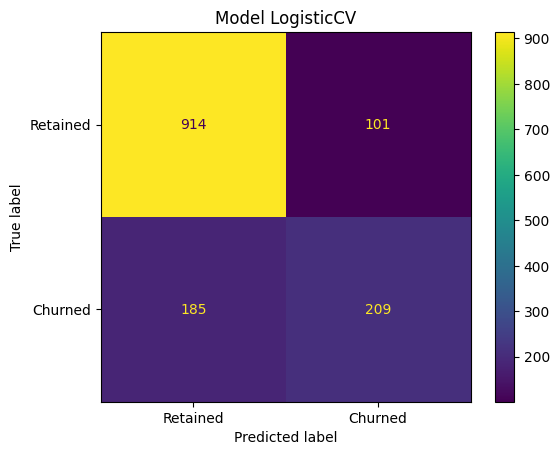

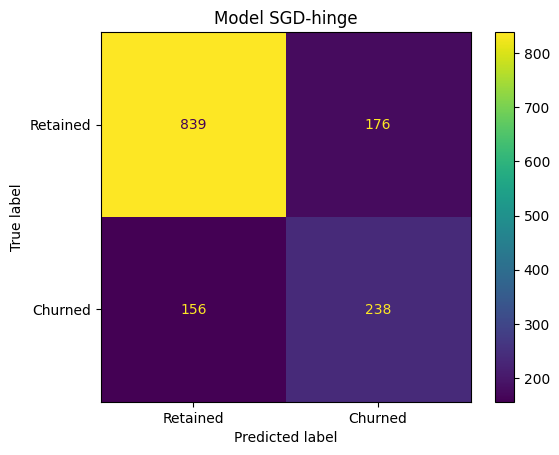

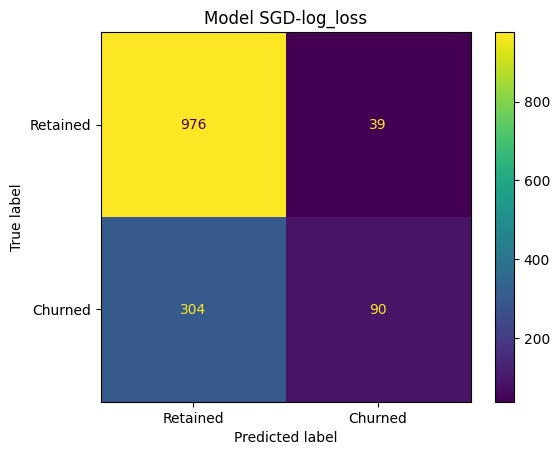

In [ ]:
for i in y_pred.drop('Y_true',axis=1):
    ConfusionMatrixDisplay(confusion_matrix(y_pred['Y_true'],y_pred[i]),display_labels=['Retained','Churned']).plot();plt.title(f'Model {i}')


In [ ]:
for j,k in range(2),range(2):
    print(j,k)

0 1
0 1
